# COMP 432 Machine Learning - Term Project Fall 2020

#### Student Names:
#### Firas Sawan       ID#26487815 
#### Giselle Martel    ID#26352936

# FakeNewsClassifiers

##### A comparison between different Machine Learning and Deep Learning models in predicting which news articles are "Fake News" or "Real News"

In [31]:
%%time
import tools.tools as tools
import preprocess as preprocess
import model.logistic_regression as LR
import model.decision_tree as DT
import model.random_forest as RF
import model.support_vector_machine as SVC
import model.naive_bayesian_classifier as NB
import model.convolutional_neural_network as CNN

import matplotlib
import matplotlib as plt
import pandas as pd
import numpy as np

import torch
torch.manual_seed(0)


CPU times: user 1.67 ms, sys: 2.39 ms, total: 4.07 ms
Wall time: 7.48 ms


# Pre-Processing Data

In [32]:
%time
# change param of use_full_dataset to True to use full data set
# Warning: may take an hour or longer to train all models using full dataset!)
use_full_dataset = True

if(not use_full_dataset) : tools.set_results_dir("./results/mock_results/")

# returns preprocessed data for ML models and CNN model
# ML data is vectorized with an idf vectorizer and CNN data is vectorized with a Count vectorizer
ml_data, cnn_data = preprocess.preprocess(use_full_dataset)

X_train, X_test, y_train, y_test = ml_data
X_train, X_test, y_train, y_test

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs

Preprocessing of data...

Parsing news dataset from file: kaggle_raw/Fake.csv
Setting label for news dataset: FAKE

Preview of Fake news Dataset
                                                   title  \
0      FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...   
1      APPLE‚ÄôS CEO SAYS RELIGIOUS FREEDOM LAWS ARE ...   
2      WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...   
3      OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY   
4      BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...   
...                                                  ...   
23445  IT BEGINS‚Ä¶RINO MEGA-DONOR Threatens Jeb Bush...   
23446  BUSTED! Maxine Waters‚Äô Ties to Black Nationa...   
23447  Democrat Senator Warns Mueller Not To Release ...   
23448  MSNBC ANCHOR Flabbergasted at What Texas Teach...   
23449  WATCH: SNOWFLAKES ASKED Communist Party Platfo...   

                                                    text   subject   

KeyboardInterrupt: 

# Logistic Regression Classifier 
## Hyperparameter search + training

In [3]:
%time
# Logisitic Regression Classifier
print("Testing Logistic Regression Classifier ...\n")

# set the hyperparams
C = np.logspace(-4,4,9)
param_grid = {"C":C}

# fetch all the estimators given the chosen hyperparameters
estimators = LR.train_all_estimators(X_train, y_train, C)

# perform hyperparam search
grid_search = LR.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Testing Logistic Regression Classifier ...

Fitting data to LogisticRegression Classifier, this may take a while...
52.233% training accuracy for C=0.000100
84.778% training accuracy for C=0.001000
88.328% training accuracy for C=0.010000
90.364% training accuracy for C=0.100000
91.015% training accuracy for C=1.000000
90.987% training accuracy for C=10.000000
90.972% training accuracy for C=100.000000
90.972% training accuracy for C=1000.000000
90.972% training accuracy for C=10000.000000
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   31.0s finished


## Calculate estimator scores and overall overfitting

In [4]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nLogistic Regression overfitting: {:.3f}\n".format(overfitting))

# display details of best estimator
tools.display_best_estimator(score, "LogisticRegression", hyperparams)



Logistic Regression overfitting: 0.059

Best LogisticRegression estimator accuracy: 90.692%
Hyperparams:
C: 10.0



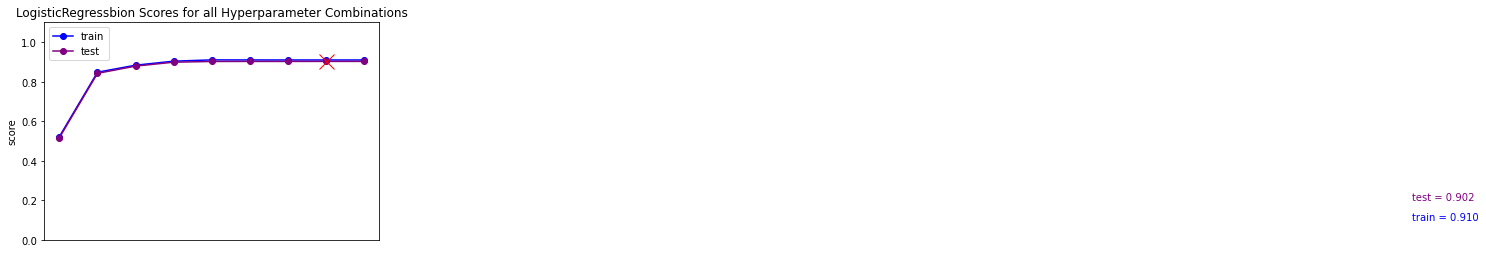

In [5]:
# plot the scores of each estimator (see test_results or results folder for png files of graphs)
tools.plot_estimator_scores("LogisticRegressbion",trn_scores,test_scores)

## Classify Data

Printing metrics...
mean squared error: 9.766%
accuracy: 90.234%
recall: 90.430%
precision: 90.644%
f1: 90.537%
jacccard: 82.710%



<Figure size 432x288 with 0 Axes>

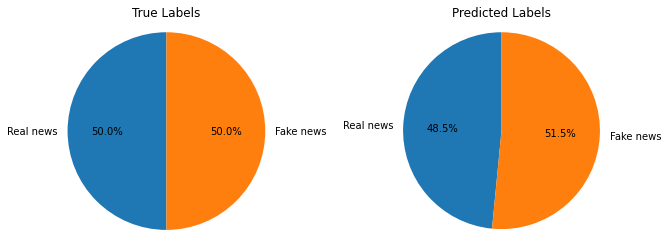

In [6]:
%%time
# use best estimator to make predictions
y_pred = LR.logistic_regression_predict(best_estimator, X_test)
tools.display_prediction_scores(y_test,y_pred)

tools.plot_predicted_labels(y_test, y_pred, "LogisticRegression")

## Confusion Matrix

Plotting confusion matrix for LogisticRegression Classifier...


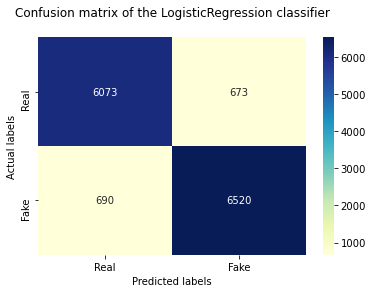

In [7]:
tools.plot_confusion_matrix(y_test,y_pred,"LogisticRegression")






# Decision Tree Classifier
## Hyperparameter search + training

In [8]:
%time
print("Testing Decision Tree Classifier ...\n")

# set the hyperparams
D = np.linspace(2,30,15)
param_grid = {"max_depth":D}

# fetch all the estimators given the chosen hyperparameters
estimators = DT.train_all_estimators(X_train, y_train, D)

# perform hyperparam search
grid_search = DT.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_ * 100

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.01 µs
Testing Decision Tree Classifier ...

Fitting data to DecisionTree, this may take a while...
71.991% training accuracy for max_depth=2.000
76.262% training accuracy for max_depth=4.000
80.730% training accuracy for max_depth=6.000
84.848% training accuracy for max_depth=8.000
88.073% training accuracy for max_depth=10.000
90.612% training accuracy for max_depth=12.000
92.793% training accuracy for max_depth=14.000
94.681% training accuracy for max_depth=16.000
96.051% training accuracy for max_depth=18.000
97.012% training accuracy for max_depth=20.000
97.663% training accuracy for max_depth=22.000
98.093% training accuracy for max_depth=24.000
98.465% training accuracy for max_depth=26.000
98.692% training accuracy for max_depth=28.000
98.904% training accuracy for max_depth=30.000
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.8min finished


## Plot Features Importances

Plotting feature importances for DecisionTree Classifier..
Saving feature importances for DecisionTree Classifier to file ./results/real_results/DecisionTree/feature_importances.png...


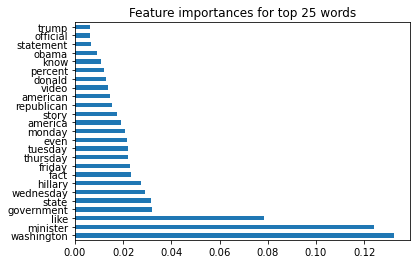

In [9]:
tools.plot_feature_importances(X_train, best_estimator, "DecisionTree", savefig=True)

## Calculate estimator scores and overall overfitting


Decision Tree overfitting: 1.191

Best DecisionTree estimator accuracy: 85.306%
Hyperparams:
max_depth: 16.0



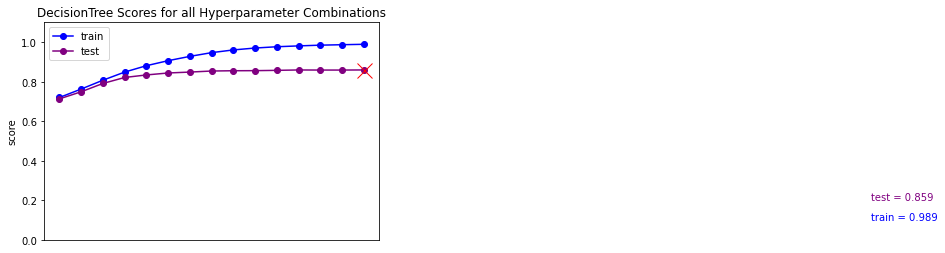

In [10]:
%%time
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nDecision Tree overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("DecisionTree",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "DecisionTree", hyperparams)

## Classify Data

Printing metrics...
mean squared error: 14.617%
accuracy: 85.383%
recall: 87.670%
precision: 84.596%
f1: 86.105%
jacccard: 75.601%



<Figure size 432x288 with 0 Axes>

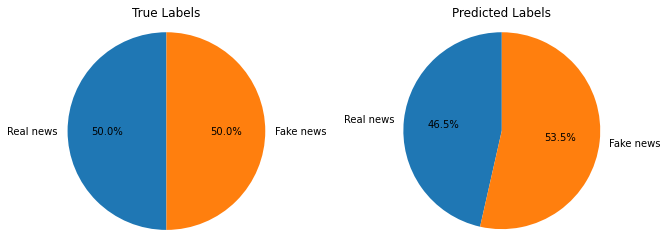

In [11]:
# use best estimator to make predictions
y_pred = DT.decision_tree_predict(best_estimator, X_test)
tools.display_prediction_scores(y_test,y_pred)

tools.plot_predicted_labels(y_test, y_pred, "DecisionTree")

## Confusion Matrix

Plotting confusion matrix for DecisionTree Classifier...


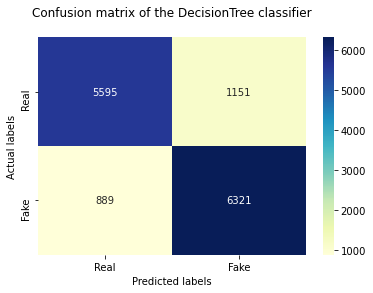

In [12]:
tools.plot_confusion_matrix(y_test,y_pred,"DecisionTree")

# Random Forest Classifier
## Hyperparameter search + training

In [13]:
%time

print("Testing Random Forest Classifier ...\n")

# set the hyperparams
D = np.linspace(2,14,7)
N = np.linspace(2,20,10, dtype="int32")

param_grid = {"max_depth":D, "n_estimators": N}

# fetch all the estimators given the chosen hyperparameters
estimators = RF.train_all_estimators(X_train,y_train,D,N)

# perform hyperparam search
grid_search = RF.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Testing Random Forest Classifier ...

Fitting data to Random Forest Classifier, this may take a while...
70.836% training accuracy for max_depth=2.000 n_estimators=2.000
75.571% training accuracy for max_depth=2.000 n_estimators=4.000
78.037% training accuracy for max_depth=2.000 n_estimators=6.000
79.668% training accuracy for max_depth=2.000 n_estimators=8.000
81.415% training accuracy for max_depth=2.000 n_estimators=10.000
81.820% training accuracy for max_depth=2.000 n_estimators=12.000
81.949% training accuracy for max_depth=2.000 n_estimators=14.000
82.358% training accuracy for max_depth=2.000 n_estimators=16.000
81.922% training accuracy for max_depth=2.000 n_estimators=18.000
82.846% training accuracy for max_depth=2.000 n_estimators=20.000
76.993% training accuracy for max_depth=4.000 n_estimators=2.000
79.232% training accuracy for max_depth=4.000 n_estimators=4.000
82.484% training accuracy for max_depth=4.000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  4.1min finished


## Plot Feature Importances

Plotting feature importances for RandomForest Classifier..


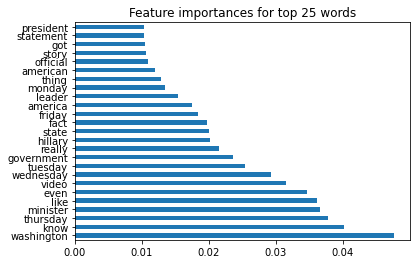

In [14]:
tools.plot_feature_importances(X_train, best_estimator, "RandomForest")

## Calculate Estimator scores and Overall Overfitting


Random Forest overfitting: 1.856

Best RandomForest estimator accuracy: 90.858%
Hyperparams:
max_depth: 14.0
n_estimators: 20



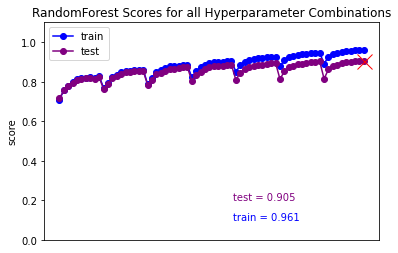

In [15]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nRandom Forest overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("RandomForest",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "RandomForest", hyperparams)

## Classify Data

<Figure size 432x288 with 0 Axes>

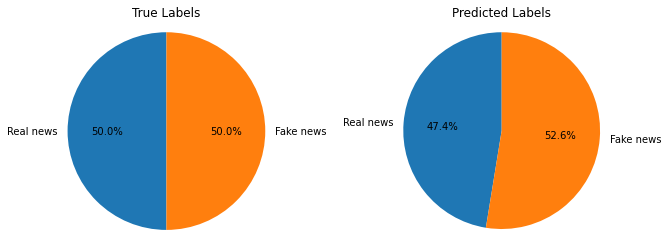

In [16]:
# use best estimator to make predictions
y_pred = RF.random_forest_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "RandomForest")

## Confusion Matrix

Plotting confusion matrix for RandomForest Classifier...


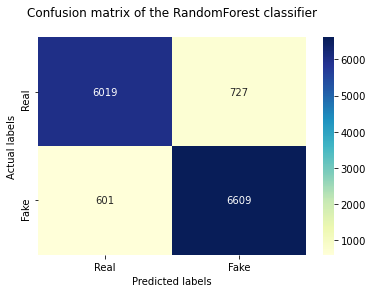

In [17]:
tools.plot_confusion_matrix(y_test,y_pred,"RandomForest")

# Support Vector Machine Classifier
## Hyperparameter search + training

In [18]:
%time
print("Testing SVM Classifier ...\n")

# set the hyperparams
C = np.logspace(-2,3,6)
G = np.logspace(-2,3,6)
K = ["rbf", "linear"]

param_grid = {"C":C, "gamma": G, "kernel": K}

# fetch all the estimators given the chosen hyperparameters
estimators = SVC.train_all_estimators(X_train, y_train, C, G, K)

# perform hyperparam search
grid_search = SVC.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
Testing SVM Classifier ...

Fitting data to SVC, this may take a while...
77.177% training accuracy for C=0.010 gamma=0.010 kernel=rbf
77.798% training accuracy for C=0.010 gamma=0.100 kernel=rbf
80.736% training accuracy for C=0.010 gamma=1.000 kernel=rbf
53.986% training accuracy for C=0.010 gamma=10.000 kernel=rbf
50.580% training accuracy for C=0.010 gamma=100.000 kernel=rbf
56.612% training accuracy for C=0.010 gamma=1000.000 kernel=rbf
76.388% training accuracy for C=0.100 gamma=0.010 kernel=rbf
75.074% training accuracy for C=0.100 gamma=0.100 kernel=rbf
75.061% training accuracy for C=0.100 gamma=1.000 kernel=rbf
55.669% training accuracy for C=0.100 gamma=10.000 kernel=rbf
64.384% training accuracy for C=0.100 gamma=100.000 kernel=rbf
56.639% training accuracy for C=0.100 gamma=1000.000 kernel=rbf
74.352% training accuracy for C=1.000 gamma=0.010 kernel=rbf
78.952% training accuracy for C=1.000 gamma=0.100 kernel=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 11.0min finished


## Calculate Estimator scores and Overall Overfitting


SVC overfitting: 0.383

Best SVC estimator accuracy: 79.744%
Hyperparams:
C: 0.1
gamma: 1.0
kernel: rbf



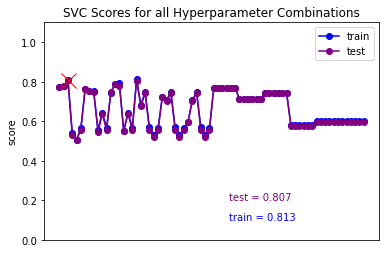

In [19]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nSVC overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("SVC",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "SVC", hyperparams)


## Classify Data

Printing metrics...
mean squared error: 18.723%
accuracy: 81.277%
recall: 81.012%
precision: 82.442%
f1: 81.721%
jacccard: 69.092%



<Figure size 432x288 with 0 Axes>

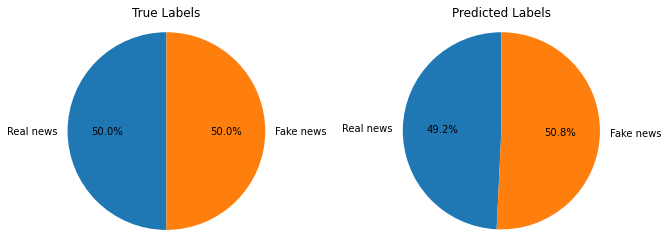

In [20]:
# use best estimator to make predictions
y_pred = SVC.support_vector_machine_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "SVC")
tools.display_prediction_scores(y_test,y_pred)

## Confusion Matrix

Plotting confusion matrix for SVC Classifier...


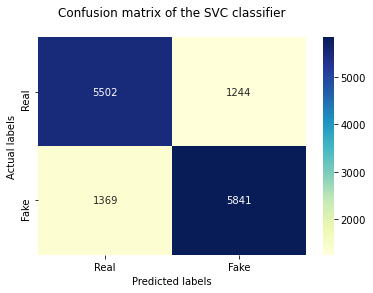

In [21]:
tools.plot_confusion_matrix(y_test,y_pred,"SVC")

# Naive Bayes Classifier
## Hyperparameter search + training

In [22]:
print("Testing Naive Bayesian Classifier ...\n")

# set the hyperparams
A = np.logspace(-4,4,9)
F = [True, False]
param_grid = {"alpha":A, "fit_prior":F}

# fetch all the estimators given the chosen hyperparameters
estimators = NB.train_all_estimators(X_train, y_train, A , F)

# perform hyperparam search
grid_search = NB.perform_hyperparam_grid_search(X_train,y_train, param_grid)

best_estimator = grid_search.best_estimator_
hyperparams = grid_search.best_params_
score = grid_search.best_score_*100


Testing Naive Bayesian Classifier ...

Fitting data to NaiveBayes Classifier, this may take a while...
87.538% training accuracy for alpha=0.0001 fit_prior=True
87.538% training accuracy for alpha=0.0010 fit_prior=True
87.538% training accuracy for alpha=0.0100 fit_prior=True
87.538% training accuracy for alpha=0.1000 fit_prior=True
87.523% training accuracy for alpha=1.0000 fit_prior=True
87.517% training accuracy for alpha=10.0000 fit_prior=True
87.320% training accuracy for alpha=100.0000 fit_prior=True
86.282% training accuracy for alpha=1000.0000 fit_prior=True
54.250% training accuracy for alpha=10000.0000 fit_prior=True
85.429% training accuracy for alpha=0.0001 fit_prior=False
85.429% training accuracy for alpha=0.0010 fit_prior=False
85.429% training accuracy for alpha=0.0100 fit_prior=False
85.429% training accuracy for alpha=0.1000 fit_prior=False
85.419% training accuracy for alpha=1.0000 fit_prior=False
85.380% training accuracy for alpha=10.0000 fit_prior=False
85.119% tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    4.1s finished


## Calculate Estimator scores and Overall Overfitting


Naive Bayes overfitting: 0.109

Best NaiveBayes estimator accuracy: 87.468%
Hyperparams:
alpha: 0.0001
fit_prior: True



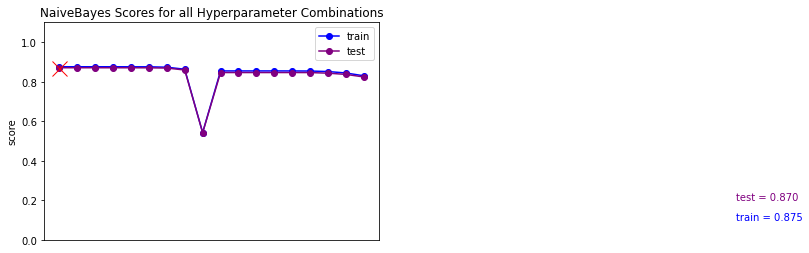

In [23]:
# calculate the training and testing scores and plot the result
trn_scores, test_scores = tools.calculate_estimator_scores([X_train, X_test, y_train, y_test], estimators)

# calculate model overfitting
overfitting = tools.determine_overfitting(trn_scores,test_scores)
print("\nNaive Bayes overfitting: {:.3f}\n".format(overfitting))

# plot the scores of each estimator
tools.plot_estimator_scores("NaiveBayes",trn_scores,test_scores)

# display details of best estimator
tools.display_best_estimator(score, "NaiveBayes", hyperparams)

## Classify Data

Saving piechart of results for NaiveBayes Classifier to file ./results/real_results/NaiveBayes/piechart.png...
Printing metrics...
mean squared error: 12.962%
accuracy: 87.038%
recall: 87.490%
precision: 87.429%
f1: 87.459%
jacccard: 77.713%



<Figure size 432x288 with 0 Axes>

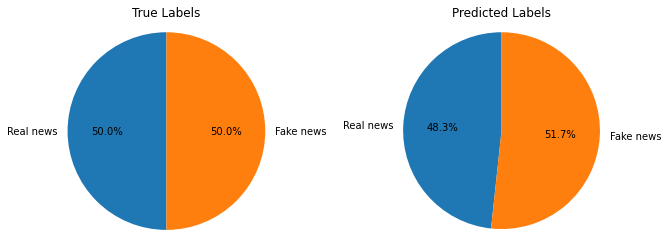

In [24]:
# use best estimator to make predictions
y_pred = NB.naive_bayesian_predict(best_estimator, X_test)

tools.plot_predicted_labels(y_test, y_pred, "NaiveBayes", True)
tools.display_prediction_scores(y_test,y_pred)

## Confusion Matrix

Plotting confusion matrix for NaiveBayes Classifier...
Saving confusion matrix for NaiveBayes Classifier to file ./results/real_results/NaiveBayes/confusion_matrix.png...


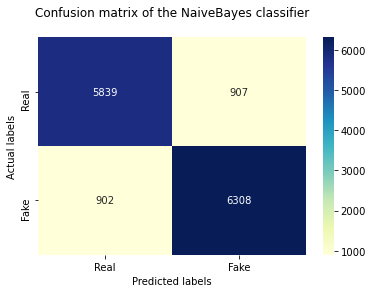

In [25]:
tools.plot_confusion_matrix(y_test,y_pred,"NaiveBayes", True)

tools.display_result(best_estimator, X_train)

# Deep Learning - Convolutional Neural Network Classifier

### Now we compare deep learning classification to our traditional Machine Learning models...

## Set model and training parameters

In [26]:
# params for CNN model
seq_len = 224
if use_full_dataset: 
    seq_len = 216
    
model_params = {
    # text preprocessing
    "seq_len": seq_len,
    "num_words": 10000,
    "embedding_size": 64,

    # size of convolution outputs
    "conv_out_size": 32,

    # Number of strides for each convolution
    "stride": 2,

    # kernel sizes
    "kernel_sizes": [2,3,4,5]
}

# training parameters
epochs = 24
batch_size = 108
learning_rate = 0.001

## Construct the CNN model

In [27]:
model = CNN.CnnModel(model_params)
model

CnnModel(
  (dropout): Dropout(p=0.25, inplace=False)
  (embedding): Embedding(10001, 64, padding_idx=0)
  (conv_layers_1): Conv1d(216, 32, kernel_size=(2,), stride=(2,))
  (conv_layers_2): Conv1d(216, 32, kernel_size=(3,), stride=(2,))
  (conv_layers_3): Conv1d(216, 32, kernel_size=(4,), stride=(2,))
  (conv_layers_4): Conv1d(216, 32, kernel_size=(5,), stride=(2,))
  (pool_layers_1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_layers_2): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_layers_3): MaxPool1d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool_layers_4): MaxPool1d(kernel_size=5, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fully_connected): Linear(in_features=1856, out_features=1, bias=True)
)

## Train the CNN

In [28]:
X_train, X_test, y_train, y_test = cnn_data
y_pred, train_accuracies, test_accuracies, train_losses, test_losses \
    = CNN.train_cnn(
        model, 
        X_train, 
        X_test, 
        y_train, 
        y_test, 
        epochs, 
        batch_size, 
        learning_rate
    )
print(train_accuracies[0], test_accuracies[0], train_losses[0], test_losses[0])

Epoch: 1, loss: 120.14606, Train accuracy: 79.94104%, Test accuracy: 90.47005%
Epoch: 2, loss: 92.35503, Train accuracy: 83.13475%, Test accuracy: 91.00029%
Epoch: 3, loss: 78.44563, Train accuracy: 85.22295%, Test accuracy: 93.20006%
Epoch: 4, loss: 68.87570, Train accuracy: 86.28854%, Test accuracy: 93.80195%
Epoch: 5, loss: 63.09681, Train accuracy: 86.99177%, Test accuracy: 93.50100%
Epoch: 6, loss: 59.59373, Train accuracy: 87.31421%, Test accuracy: 93.84494%
Epoch: 7, loss: 60.91014, Train accuracy: 87.44626%, Test accuracy: 93.64431%
Epoch: 8, loss: 56.76654, Train accuracy: 87.74413%, Test accuracy: 93.50100%
Epoch: 9, loss: 56.08249, Train accuracy: 87.72878%, Test accuracy: 93.76612%
Epoch: 10, loss: 57.00569, Train accuracy: 87.74413%, Test accuracy: 93.73030%
Epoch: 11, loss: 56.60469, Train accuracy: 87.43091%, Test accuracy: 93.70880%
Epoch: 12, loss: 54.00735, Train accuracy: 87.90689%, Test accuracy: 93.76612%
Epoch: 13, loss: 55.73577, Train accuracy: 87.49539%, Test a

## Plot Training + Test Prediction Accuracies for each Epoch

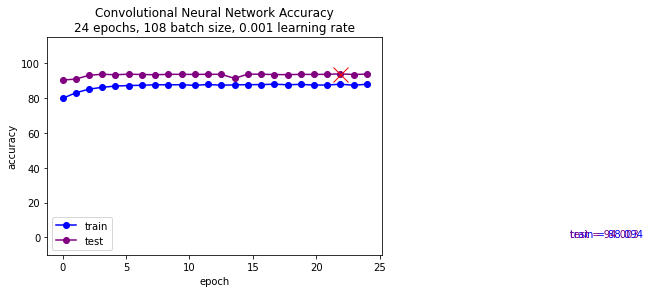

In [29]:
tools.plot_cnn_accuracies(train_accuracies,test_accuracies, "CNN", epochs, batch_size, learning_rate)


## Plot Training + Test Prediction Losses for each Epoch

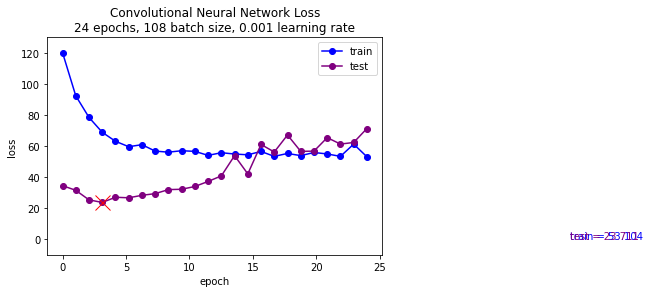

In [30]:
tools.plot_cnn_losses(train_losses, test_losses, "CNN", epochs, batch_size, learning_rate)